In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import pickle


In [8]:
# data = pd.read_csv('../data/covid19/subdata/ADT_'+id+'.csv',index_col=0)
adtdata = sc.read_h5ad('../data/covid19/adtdata.h5ad')
rnadata = sc.read_h5ad('../data/covid19/rnadata.h5ad')


In [5]:
from Classifier.Visualize import plot_keymarker,visualize_modeltree
from Classifier.BTreeTraversal import BTreeTraversal
# f = open('../output/9_2/1/0/tree_retrain.pickle','rb')
# modeltree = pickle.load(f)
# visualize_modeltree(modeltree, '../output/9_2/1/0', 'tree_complete')


[784510]
/home/xinzhu/Desktop/git-test/CITE-sortV2


In [37]:
# adata_pp = rnadata
adata_pp = sc.read_h5ad('../data/covid19/RNA_exdb.h5ad')
adata_pp.obs['datasets'] = 's1'
adata_pp.obs['batch'] = adata_pp.obs['Source']
adata_pp.obs['batches'] = adata_pp.obs['batch']

In [40]:
j =1

adata_pp.obs['pred'] = None
for i in range(6):
    batch = adata_pp[adata_pp.obs['datasets']=='s'+str(i+1)].obs['batch'].cat.categories
    for b in batch:
        pred = pd.read_csv('../output/9_2/'+str(i+1)+'/'+str(j)+'/leaf_labels.csv',index_col=0)
        adata_pp.obs['pred'].loc[pred.index] = pred['Label']
        j = j + 1        

/tmp/ipykernel_3949234/1434543916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_pp.obs['pred'].loc[pred.index] = pred['Label']
/tmp/ipykernel_3949234/1434543916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_pp.obs['pred'].loc[pred.index] = pred['Label']
/tmp/ipykernel_3949234/1434543916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_pp.obs['pred'].loc[pred.index] = pred['Label']
/tmp/ipykernel_3949234

In [41]:
adata_pp.obs['pred']

AAACCTGAGAAAGTGG-1-gPlexA1     26_leaf
AAACCTGAGCGGATCA-1-gPlexA1    115_leaf
AAACCTGAGGCGACAT-1-gPlexA1     47_leaf
AAACCTGAGGGAACGG-1-gPlexA1     25_leaf
AAACCTGCACATGTGT-1-gPlexA1     47_leaf
                                ...   
TTTGTCAGTGGCAAAC-1-gPlexK7     47_leaf
TTTGTCAGTTACCGAT-1-gPlexK7    233_leaf
TTTGTCATCCTCTAGC-1-gPlexK7     26_leaf
TTTGTCATCGAGGTAG-1-gPlexK7     49_leaf
TTTGTCATCTCCCTGA-1-gPlexK7     47_leaf
Name: pred, Length: 784510, dtype: object

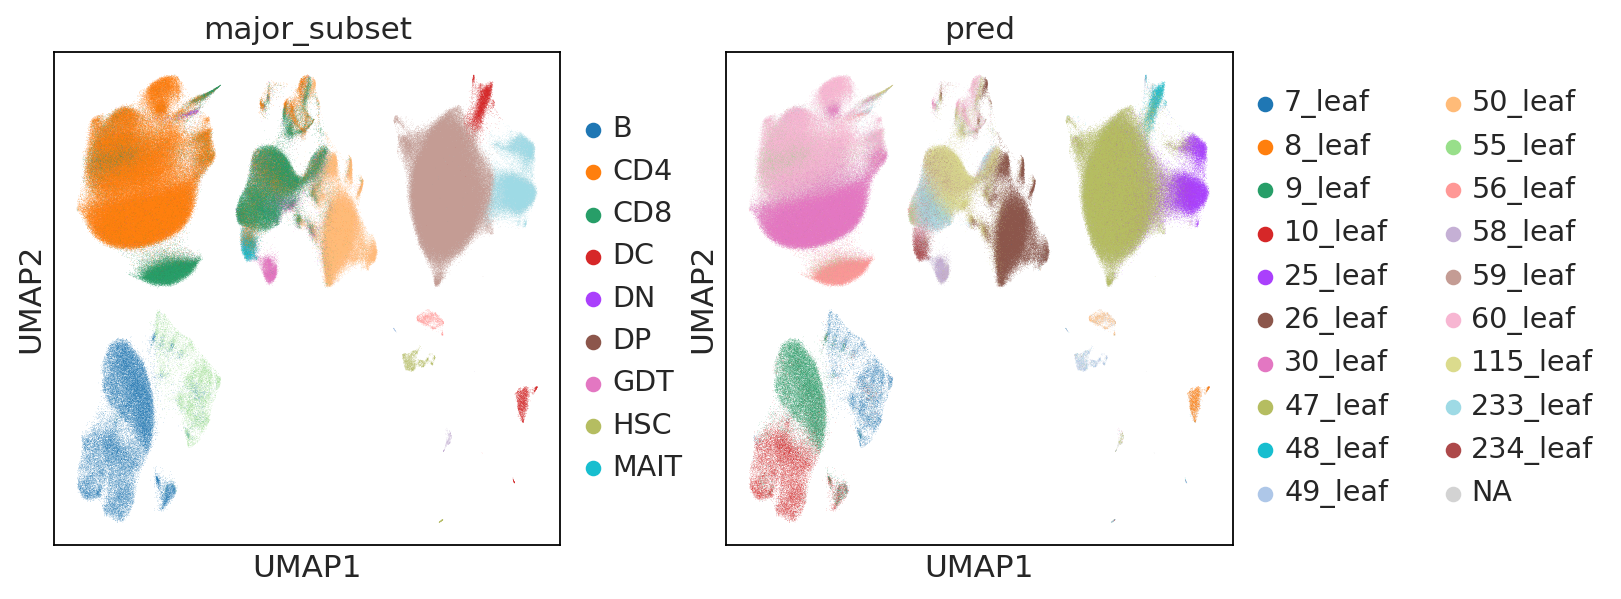

In [42]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.umap(adata_pp, color=['major_subset','pred'])

In [17]:

id='9_2/_0'
# f = open('./output/PBMC_1/0/tree_retrain.pickle','rb')
f = open('../output/9_2/1/0/tree.pickle','rb')

tree = pickle.load(f)
queue, idxlist = [tree], [0]
# print(queue)

mapping = pd.DataFrame(index=adata_pp.var_names)
while len(queue)>0:
    node = queue.pop(0)
    ind = idxlist.pop(0)
    if node.key != ('leaf',):
        mapping[ind] = 0
        vars = mapping.index.intersection(node.artificial_w.index)
        mapping.loc[vars,ind] = node.artificial_w[vars]
        queue.append(node.left)
        queue.append(node.right)
        idxlist.append(2*ind+1)
        idxlist.append(2*ind+2)
    
# mapping.to_csv('./output/PBMC_1/0/new_mapping.csv') 

In [152]:
adata_pp.obsm['X_pca_lda'] = adata_pp.X.dot(mapping_scale)
# sc.pp.neighbors(adata_pp, n_neighbors=20, key_added='lda',use_rep='X_pca_lda')
# adata_lda = adata_pp.copy()
# sc.tl.umap(adata_lda,neighbors_key='lda')
# sc.pl.umap(adata_lda,color=['cell_type','pred'])

In [48]:
def numdfs(n,numlist):
    if n < 120:
        numlist = numlist + [2*n+1,2*n+2]
        numlist = list(set(numlist))

        numlist = numlist + numdfs(2*n+1,numlist)
        numlist = numlist + numdfs(2*n+2,numlist)
        numlist = list(set(numlist))

    return numlist

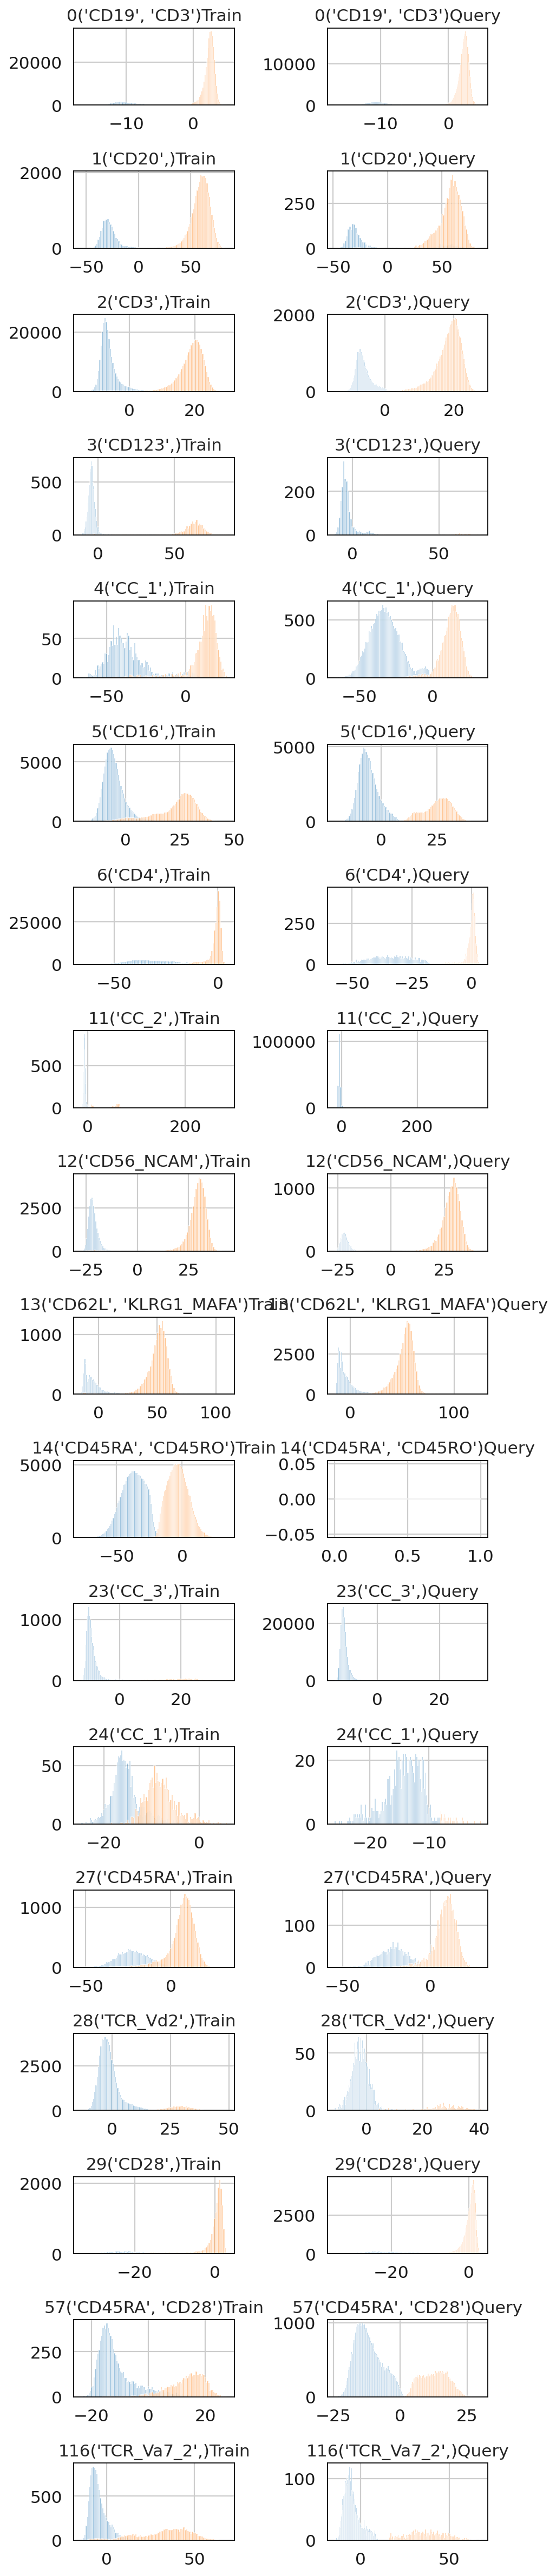

In [49]:
### Hist Tree
import numpy as np
queue = [tree]
print(queue)
i = 0
idxlist = [0]
# embedding = pd.DataFrame(index=adata_pp.obs_names)
fig, axes = plt.subplots(18,2, figsize=(6, 30))
while len(queue)>0:
    node = queue.pop(0)
    idx = idxlist.pop(0)
    if node.key != ('leaf',):
        
        
        trainid = np.array(node.indices) - 1
        # print(trainid)
        trainname = adata_pp.obs['batches'].cat.categories[trainid]
            
        numlist = numdfs(idx*2+1,[idx*2+1])
        # print(numlist)
        subdata = adata_pp[adata_pp.obs['pred'].isin(str(x)+'_'+'leaf' for x in numlist)]
        # subdata = subdata[subdata.obs['datasets']=='s3']
        # subdata = adata_pp[adata_pp.obs['datasets']=='s3']
        
        # subdata = adata_pp[adata_pp.obs['cell_type']=='Mono']
        # axes[i,0].hist(subdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)

        subsubdata = subdata[subdata.obs['batches'].isin(trainname)]
        axes[i,0].hist(subsubdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)
        subsubdata = subdata[~subdata.obs['batches'].isin(trainname)]
        axes[i,1].hist(subsubdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)

        numlist = numdfs(idx*2+2,[idx*2+2])
        # print(node.embedding)
        subdata = adata_pp[adata_pp.obs['pred'].isin(str(x)+'_'+'leaf' for x in numlist)]
        # print(subdata.obs['cell_type'].value_counts())
        # subdata = subdata[subdata.obs['datasets']=='s2']
        # axes[i,0].hist(subdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)

        subsubdata = subdata[subdata.obs['batches'].isin(trainname)]
        axes[i,0].hist(subsubdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)
        subsubdata = subdata[~subdata.obs['batches'].isin(trainname)]
        axes[i,1].hist(subsubdata.obsm['X_pca_lda'][:,i],bins=100,alpha=0.5)
        
        # axes[i, 0].set_title(str(idx)+str(node.key), loc='left')
        axes[i,0].set_title(str(idx)+str(node.key) + 'Train',loc='center')
        axes[i,1].set_title(str(idx)+str(node.key) + 'Query',loc='center')

        # plt.title(str(idx)+str(node.key))
        # plt.show()
        queue.append(node.left)
        queue.append(node.right)
        idxlist.append(2*idx+1)
        idxlist.append(2*idx+2)

        i += 1


plt.tight_layout()

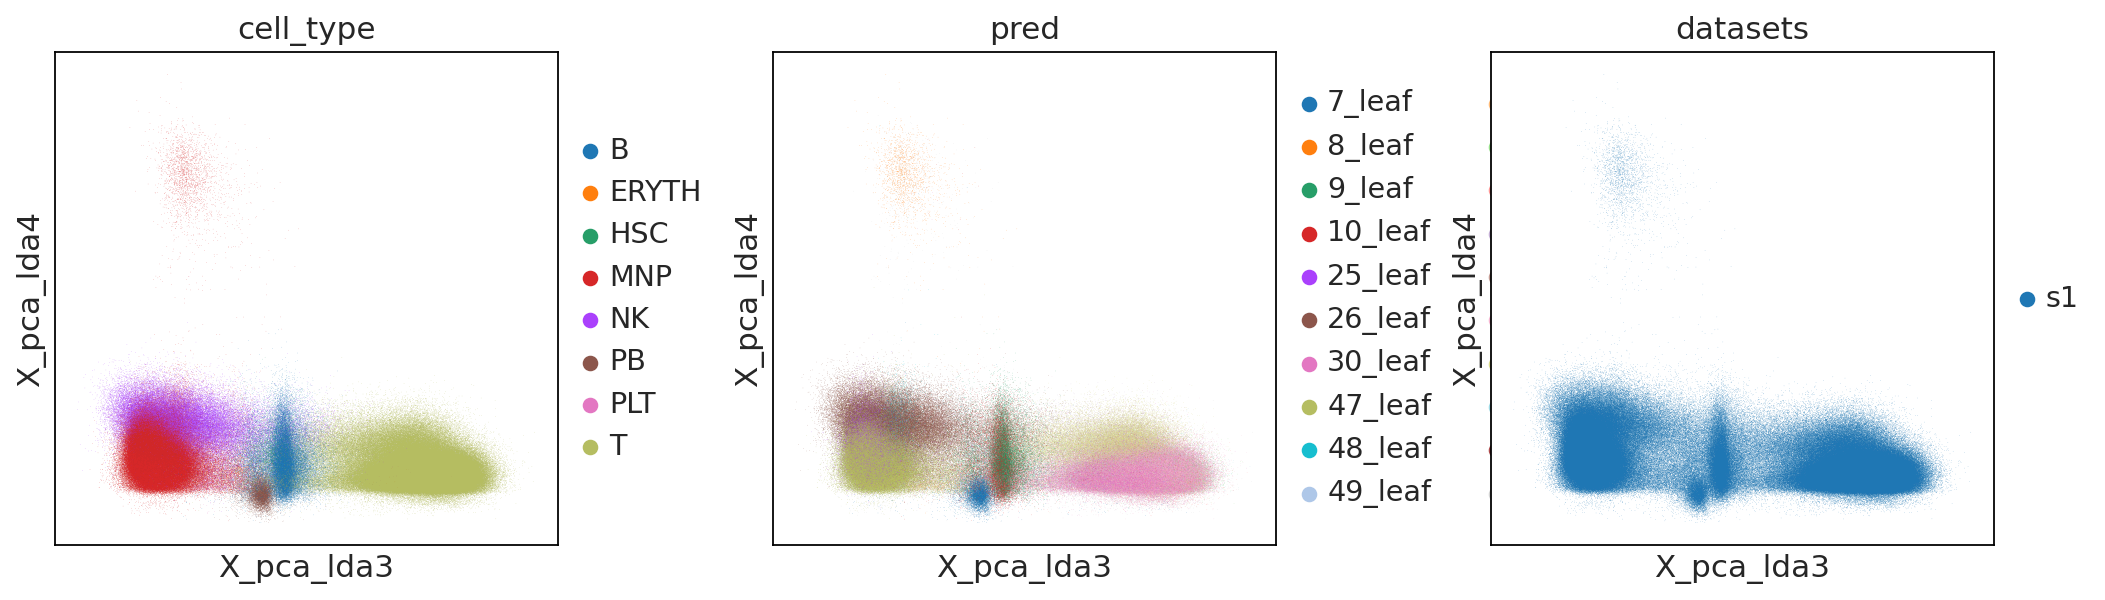

In [153]:
sc.pl.embedding(adata_pp,basis='X_pca_lda',dimensions=[2,3],color=['cell_type','pred','datasets'],wspace=0.3)

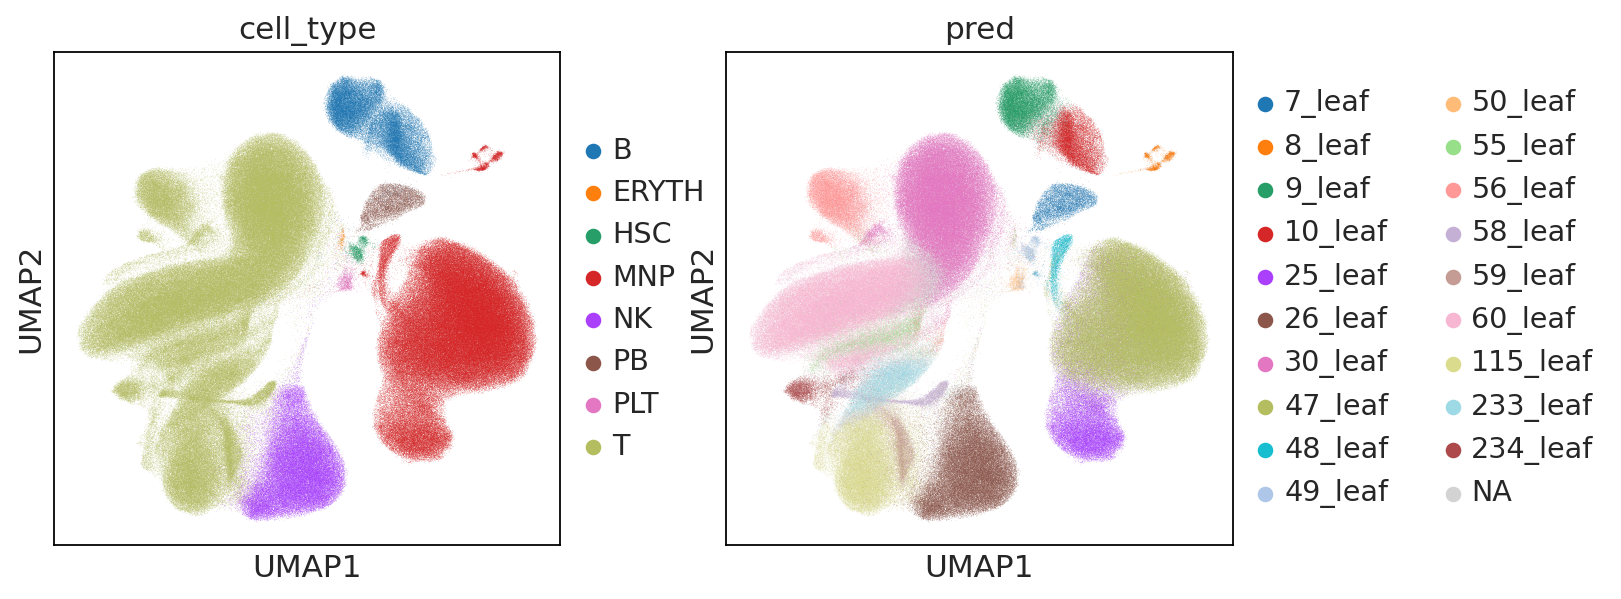

: 

In [155]:
sc.pp.neighbors(adata_pp, n_neighbors=10, key_added='lda',use_rep='X_pca_lda')
adata_lda = adata_pp.copy()
sc.tl.umap(adata_lda,neighbors_key='lda')
sc.pl.umap(adata_lda,color=['cell_type','pred'])

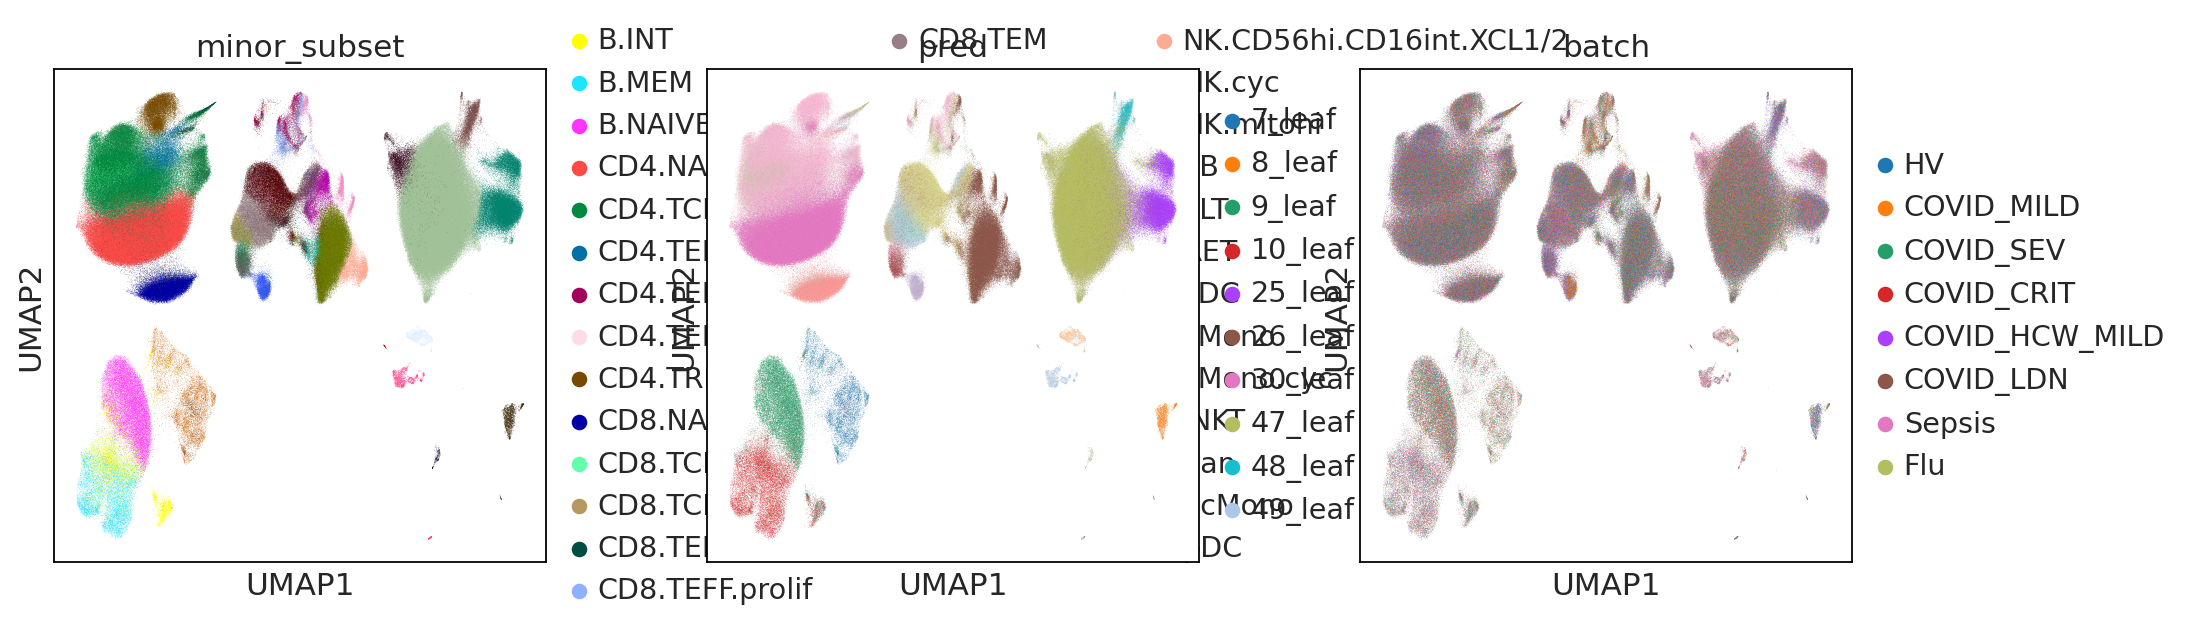

In [64]:
sc.pl.umap(adata_lda,color=['minor_subset','pred','batch'])

In [124]:
## Normalize mapping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mapping_norm = pd.DataFrame(scaler.fit_transform(mapping), columns=mapping.columns)


In [151]:
mapping_scale = mapping_norm.copy()
for i in mapping_norm.columns:
    t  = (np.log2(2*i+1)+1)/10
    mapping_scale.loc[:,i] = mapping_norm.loc[:,i] * t
    print(i,t)

0 0.1
1 0.25849625007211563
2 0.3321928094887362
3 0.3807354922057604
4 0.4169925001442312
5 0.44594316186372973
6 0.4700439718141093
11 0.5523561956057013
12 0.5643856189774724
13 0.5754887502163468
14 0.5857980995127572
23 0.6554588851677637
24 0.6614709844115209
27 0.678135971352466
28 0.6832890014164741
29 0.6882643049361842
57 0.7845490050944375
116 0.886418614465428
